In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import *
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
import warnings
from collections import defaultdict, Counter
from sklearn.cross_validation import train_test_split
import gc, re
import xgboost as xgb
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline  

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [197]:
train_data.shape

(4459, 4993)

In [198]:
4993 - 4459

534

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
ID_TRAIN = train_data.ID.values
ID_TEST = test_data.ID.values

In [4]:
all_data = pd.concat([train_data.drop(columns=['target']), test_data])

In [5]:
all_data.reset_index(inplace=True)

In [3]:
columns = open('columns.txt').read().splitlines()
rows = list(map(int, open('rows.txt').read().splitlines()))

In [ ]:
all_data.iloc[rows][columns[0]]

In [7]:
pred = list(all_data.iloc[rows][columns[2]].values)[2:] + [0, 0]

In [8]:
pred_data = pd.DataFrame({'ID':all_data.ID.iloc[rows], 'pred':pred})

In [21]:
pred_data

,ID,pred
1757,6726fff18,115636.36
3809,d94655f86,834800.00
511,1df3ca92e,296444.44
3798,d8e48b069,247166.66
625,24204cd10,550000.00
3303,bf6c2d1ef,440000.00
4095,eacc7ab9e,0.00
1283,4a5425356,1600000.00
4209,f0a57697d,466461.54
1696,625e88875,3147200.00


In [67]:
pred_data

,ID,pred
1757,6726fff18,115636.36
3809,d94655f86,834800.00
511,1df3ca92e,296444.44
3798,d8e48b069,247166.66
625,24204cd10,550000.00
3303,bf6c2d1ef,440000.00
4095,eacc7ab9e,0.00
1283,4a5425356,1600000.00
4209,f0a57697d,466461.54
1696,625e88875,3147200.00


In [15]:
id2pred = {}
for i, v in pred_data[['ID', 'pred']].values:
    id2pred[i] = v

In [16]:
id2target = {}
for i, v in train_data[['ID', 'target']].values:
    id2target[i] = v

In [17]:
pred = all_data['ID'].iloc[rows].apply(lambda x: id2pred.get(x, 0))
targ = all_data['ID'].iloc[rows].apply(lambda x: id2target.get(x, 0))

In [25]:
collast = all_data[columns[-1]].iloc[rows]

In [22]:
dt = all_data[['ID', columns[2]]].iloc[rows]

In [27]:
dt['pred'] = pred
dt['target'] = targ
dt['last'] = collast

In [28]:
dt.to_csv('align.tsv', sep='\t')

In [40]:
train_pred = [id2pred[i] for i in ID_TRAIN]

In [41]:
train_pred

[0.0,
 5000000.0,
 0.0,
 0.0,
 0.0,
 880000.0,
 0.0,
 0.0,
 966000.0,
 1400000.0,
 0.0,
 0.0,
 0.0,
 23160000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 40000.0,
 0.0,
 30000000.0,
 521333.34,
 0.0,
 0.0,
 0.0,
 30000000.0,
 0.0,
 366000.0,
 0.0,
 27777777.78,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 92500.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1583000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2200000.0,
 110000.0,
 0.0,
 0.0,
 700000.0,
 0.0,
 5000000.0,
 0.0,
 600000.0,
 0.0,
 0.0,
 40000000.0,
 0.0,
 0.0,
 0.0,
 7300000.0,
 37134000.0,
 10600000.0,
 0.0,
 230000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10000000.0,
 28000000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6050000.0,
 0.0,
 0.0,
 0.0,
 1433333.34,
 20000000.0,
 0.0,
 2800000.0,
 0.0,
 0.0,
 0.0,
 335000.0,
 1200000.0,
 21100000.0,
 0.0,
 0.0,
 7494000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20000000.0,
 0.0,
 1900000.0,
 1060000.0,
 400000.0,
 0.0,
 7400000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 400000.0,
 0.0,
 3000000.0

In [42]:
true = train_data.target.values

In [43]:
true

array([38000000.,   600000., 10000000., ...,  2800000., 10000000.,
       20000000.])

In [63]:
true

[[38000000.0,
  600000.0,
  10000000.0,
  2000000.0,
  14400000.0,
  2800000.0,
  164000.0,
  600000.0,
  979000.0,
  460000.0,
  1100000.0,
  16000000.0,
  354000.0,
  7000000.0,
  100000.0,
  800000.0,
  200000.0,
  3600000.0,
  2786000.0,
  40000.0,
  1600000.0,
  3266666.66,
  6140000.0,
  14886000.0,
  833333.34,
  400000.0,
  6500000.0,
  1700000.0,
  933333.34,
  4000000.0,
  102000.0,
  20000000.0,
  4666666.66,
  20000000.0,
  890000.0,
  6000000.0,
  20000000.0,
  2000000.0,
  18000000.0,
  6400000.0,
  20000000.0,
  10000000.0,
  5000000.0,
  9000000.0,
  34738000.0,
  4000000.0,
  1650000.0,
  4500000.0,
  13200000.0,
  10000000.0,
  2450000.0,
  10050000.0,
  1400000.0,
  2000000.0,
  26000000.0,
  232000.0,
  6000000.0,
  300000.0,
  100000.0,
  8000000.0,
  20000000.0,
  19333333.34,
  680000.0,
  8160000.0,
  28000000.0,
  101000.0,
  9000000.0,
  12000000.0,
  1068000.0,
  10000000.0,
  25000000.0,
  78000.0,
  5000000.0,
  4000000.0,
  32500000.0,
  200000.0,
  620000

In [45]:
train_pred

[115636.36,
 834800.0,
 296444.44,
 247166.66,
 550000.0,
 440000.0,
 0.0,
 1600000.0,
 466461.54,
 3147200.0,
 75000.0,
 1477600.0,
 0.0,
 310000.0,
 3513333.34,
 160000.0,
 2352551.72,
 280000.0,
 5450500.0,
 1359000.0,
 60000.0,
 12000000.0,
 500000.0,
 1878571.42,
 814800.0,
 307000.0,
 528666.66,
 609200.0,
 448666.66,
 0.0,
 400000.0,
 60666.66,
 0.0,
 1227333.34,
 267428.58,
 2779666.66,
 588000.0,
 1304800.0,
 5187333.34,
 20000000.0,
 3530500.0,
 121000.0,
 1060000.0,
 0.0,
 6814000.0,
 3095200.0,
 1859333.34,
 972000.0,
 111791333.34,
 3862000.0,
 42000.0,
 282333.34,
 3056888.88,
 18136333.34,
 380000.0,
 1554666.66,
 6666666.66,
 8410736.74,
 11973333.34,
 10814666.66,
 23180000.0,
 447333.34,
 5352666.66,
 12156000.0,
 19360545.46,
 3012000.0,
 5629600.0,
 800000.0,
 3420000.0,
 4625000.0,
 10491200.0,
 374000.0,
 1933333.34,
 1838333.34,
 18566666.66,
 1966571.42,
 4900000.0,
 16733333.34,
 0.0,
 0.0,
 3244909.1,
 10433333.34,
 356000.0,
 52932000.0,
 1912500.0,
 2286500.

In [15]:
all_data.iloc[rows][['ID', columns[0]]]

,ID,f190486d6
1757,6726fff18,1015000.00
3809,d94655f86,540000.00
511,1df3ca92e,115636.36
3798,d8e48b069,834800.00
625,24204cd10,296444.44
3303,bf6c2d1ef,247166.66
4095,eacc7ab9e,550000.00
1283,4a5425356,440000.00
4209,f0a57697d,0.00
1696,625e88875,1600000.00


In [21]:
all_data.shape

(53801, 4993)

In [ ]:
d_t = test_data.apply(lambda x : np.std(x)/np.mean(x), axis=0)
d = train_data.apply(lambda x : np.std(x)/np.mean(x), axis=0)

In [38]:
rows

[1757,
 3809,
 511,
 3798,
 625,
 3303,
 4095,
 1283,
 4209,
 1696,
 3511,
 816,
 245,
 1383,
 2071,
 3492,
 378,
 2971,
 2366,
 4414,
 2790,
 3979,
 193,
 1189,
 3516,
 810,
 4443,
 3697,
 235,
 1382,
 4384,
 3418,
 4396,
 921,
 1887,
 4281,
 3176,
 2532,
 2824,
 650,
 2590,
 3226,
 114,
 4298,
 4412,
 1567,
 214,
 2902,
 1895,
 3920,
 943,
 2636,
 4004,
 1440,
 1220,
 10659,
 3551,
 3620,
 39443,
 46548,
 127,
 2511,
 24869,
 10142,
 3910,
 11377,
 12191,
 180,
 21038,
 46306,
 1918,
 33374,
 4204,
 3558,
 1479,
 4031,
 12872,
 35786,
 1486,
 2555,
 3850,
 521,
 813,
 22112,
 1430,
 17995,
 46898,
 1095,
 1398,
 497,
 3843,
 20536,
 8620,
 3842,
 5827,
 2848,
 3742,
 24853,
 1582,
 16394,
 23356,
 3075,
 10774,
 24103,
 423,
 29777,
 20228,
 38471,
 45395,
 48331,
 1986,
 3493,
 25080,
 38615,
 52366,
 156,
 1680,
 29599,
 52282,
 2217,
 17946,
 30112,
 4109,
 50092,
 3227,
 6042,
 45853,
 51413,
 418,
 29580,
 53156,
 1778,
 2162,
 3509,
 4040,
 4201,
 39347,
 3340,
 30701,
 42134,


In [41]:
true[3809]

834800.0

In [37]:
train_pred

[115636.36,
 834800.0,
 296444.44,
 247166.66,
 550000.0,
 440000.0,
 0.0,
 1600000.0,
 466461.54,
 3147200.0,
 75000.0,
 1477600.0,
 0.0,
 310000.0,
 3513333.34,
 160000.0,
 2352551.72,
 280000.0,
 5450500.0,
 1359000.0,
 60000.0,
 12000000.0,
 500000.0,
 1878571.42,
 814800.0,
 307000.0,
 528666.66,
 609200.0,
 448666.66,
 0.0,
 400000.0,
 60666.66,
 0.0,
 1227333.34,
 267428.58,
 2779666.66,
 588000.0,
 1304800.0,
 5187333.34,
 20000000.0,
 3530500.0,
 121000.0,
 1060000.0,
 0.0,
 6814000.0,
 3095200.0,
 1859333.34,
 972000.0,
 111791333.34,
 3862000.0,
 42000.0,
 282333.34,
 3056888.88,
 18136333.34,
 380000.0,
 1554666.66,
 6666666.66,
 8410736.74,
 11973333.34,
 10814666.66,
 23180000.0,
 447333.34,
 5352666.66,
 12156000.0,
 19360545.46,
 3012000.0,
 5629600.0,
 800000.0,
 3420000.0,
 4625000.0,
 10491200.0,
 374000.0,
 1933333.34,
 1838333.34,
 18566666.66,
 1966571.42,
 4900000.0,
 16733333.34,
 0.0,
 0.0,
 3244909.1,
 10433333.34,
 356000.0,
 52932000.0,
 1912500.0,
 2286500.

In [101]:
d2v_t = defaultdict(list)
d2id_t = defaultdict(list)

d2v = defaultdict(list)
d2id = defaultdict(list)

for i, value in enumerate(d_t.values):
    p = re.sub('\.', '', str(value))[:6]
    d2v_t[p].append((i, value))
    d2id_t[i].append(value)

for i, value in enumerate(d.values):  
    p = re.sub('\.', '', str(value))[:6]
    d2v[p].append((i, value))
#     d2id[i].append(value)

In [102]:
d2v

defaultdict(list,
            {'970080': [(53, 9.700809684958365)],
             '134051': [(222, 13.405151831157239)],
             '359158': [(3504, 35.915819399681084)],
             '339904': [(722, 33.990402513953676)],
             '784731': [(937, 7.847310515024996)],
             '135913': [(3924, 13.591361813948264)],
             '283896': [(3503, 28.38965811254781)],
             '469560': [(4116, 46.95606316289026)],
             '469501': [(4664, 46.950161298909954)],
             '423125': [(4211, 42.31258421094953)],
             '822847': [(3205, 8.228479390070072)],
             '232897': [(4423, 23.289747871571116)],
             '274012': [(3359, 27.401274615997796)],
             '140144': [(4927, 14.01446318820966)],
             '649955': [(1447, 6.499554349402365)],
             '721813': [(4532, 7.218131337298867)],
             '658770': [(2822, 6.587704774361934)],
             '569371': [(3596, 56.937192057502955)],
             '224873': [(4140, 22.487310782

In [59]:
conts = []
conts_10 = []
conts_100 = []
for i in range(len(train_target)):
    t = train_target[i]
    vs = train_data.iloc[i].values
    if t in vs:
        k = np.abs(vs-t).argmin()
        conts.append((i, k, train_data.columns[k], t, np.mean(vs)))
    
#     if t*2 in vs:
#         conts_10.append((i, np.abs(vs-(t*2)).argmin(), t))
    
    elif t*0.1 in vs:
        k = np.abs(vs-(t*0.1)).argmin()
        conts_100.append((i, k, train_data.columns[k], t, np.mean(vs)))
#         conts_100.append((i, , t))

In [61]:
conts_100

[(2, 1524, '9fa38def3', 10000000.0, 15267.481466639952),
 (11, 693, '1d9078f84', 16000000.0, 31757.0293207774),
 (15, 2837, 'eae884486', 800000.0, 25159.062312161892),
 (37, 2513, '1fe5d56b9', 2000000.0, 50237.794690442795),
 (64, 37, '87ffda550', 28000000.0, 89139.11707874174),
 (67, 49, 'ecdef52b2', 12000000.0, 218982.167902224),
 (82, 1943, '5a1589f1a', 16000000.0, 1502.7048687637748),
 (132, 2193, 'e16a20511', 18000000.0, 41989.514458024445),
 (140, 2973, 'ff65215db', 100000.0, 289392.90723702667),
 (174, 122, '587a5d8c3', 2000000.0, 7160.68924063314),
 (192, 3377, '86558e595', 3600000.0, 48479.529821679025),
 (224, 4953, '1189ee335', 8400000.0, 121188.9400921659),
 (260, 2371, 'e9d64c20a', 7000000.0, 32946.73745942697),
 (273, 355, '29c059dd2', 50000.0, 2865.123891003807),
 (303, 29, 'bd8f989f1', 10000000.0, 296202.65352835105),
 (330, 1359, 'd7978c11c', 4000000.0, 34487.78276898417),
 (410, 3969, '181e91b1c', 28000000.0, 79051.1023161691),
 (439, 1098, 'd6006ff44', 200000.0, 1293

In [53]:
train_data.iloc[2].to_csv('2_row.tsv')

In [28]:
dist = defaultdict(dict)
target_set = set(train_target)
for i, column in enumerate(train_data.columns):
    
    
    for m in [0.01, 0.1, 0.02, 0.2, 0.4, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000]:
        vs = set(train_data[column].values*m)
        dist[i][m] = len(vs & target_set)

In [32]:
dist

defaultdict(dict,
            {0: {0.01: 3,
              0.02: 4,
              0.1: 10,
              0.2: 15,
              0.4: 19,
              0.5: 17,
              1: 23,
              2: 24,
              3: 18,
              4: 20,
              5: 22,
              6: 16,
              7: 19,
              8: 16,
              9: 12,
              10: 22,
              20: 21,
              30: 17,
              40: 16,
              50: 15,
              60: 13,
              70: 9,
              80: 12,
              90: 9,
              100: 13,
              1000: 2},
             1: {0.01: 1,
              0.02: 1,
              0.1: 2,
              0.2: 2,
              0.4: 2,
              0.5: 3,
              1: 2,
              2: 2,
              3: 2,
              4: 2,
              5: 3,
              6: 3,
              7: 3,
              8: 3,
              9: 3,
              10: 3,
              20: 2,
              30: 2,
              40: 2,
        

In [33]:
mults = {}
for i in dist:
    
    mx = max(dist[i].items(), key=lambda x: x[1])
    mults[i] = mx[0]

In [34]:
mults

{0: 2,
 1: 5,
 2: 1,
 3: 0.5,
 4: 2,
 5: 0.5,
 6: 0.5,
 7: 0.1,
 8: 1,
 9: 2,
 10: 0.5,
 11: 2,
 12: 2,
 13: 0.5,
 14: 0.5,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 4,
 20: 0.1,
 21: 0.5,
 22: 1,
 23: 1,
 24: 0.1,
 25: 2,
 26: 0.1,
 27: 1,
 28: 0.5,
 29: 1,
 30: 4,
 31: 1,
 32: 1,
 33: 0.1,
 34: 2,
 35: 0.5,
 36: 0.1,
 37: 1,
 38: 1,
 39: 0.5,
 40: 1,
 41: 0.1,
 42: 1,
 43: 5,
 44: 1,
 45: 1,
 46: 0.1,
 47: 0.5,
 48: 1,
 49: 0.5,
 50: 2,
 51: 0.5,
 52: 1,
 53: 1,
 54: 0.5,
 55: 1,
 56: 0.5,
 57: 0.1,
 58: 0.5,
 59: 2,
 60: 0.5,
 61: 0.5,
 62: 0.5,
 63: 0.2,
 64: 1,
 65: 5,
 66: 1,
 67: 0.1,
 68: 0.1,
 69: 0.1,
 70: 0.1,
 71: 0.5,
 72: 0.1,
 73: 0.1,
 74: 0.5,
 75: 0.1,
 76: 4,
 77: 5,
 78: 0.5,
 79: 0.5,
 80: 2,
 81: 0.5,
 82: 1,
 83: 1,
 84: 1,
 85: 5,
 86: 0.2,
 87: 1,
 88: 5,
 89: 0.5,
 90: 0.5,
 91: 0.5,
 92: 2,
 93: 2,
 94: 2,
 95: 0.5,
 96: 1,
 97: 0.5,
 98: 1,
 99: 0.1,
 100: 1,
 101: 1,
 102: 1,
 103: 0.1,
 104: 1,
 105: 1,
 106: 0.1,
 107: 1,
 108: 1,
 109: 1,
 110: 0.2,
 111: 1,


In [18]:
sorted(conts_10, key=lambda x: x[1]+1)

[(325, 8, 5000000.0),
 (938, 8, 10000000.0),
 (1144, 8, 5000000.0),
 (1175, 8, 10000000.0),
 (1203, 8, 20000000.0),
 (1663, 8, 100000.0),
 (2130, 8, 5000000.0),
 (2537, 8, 700000.0),
 (2624, 8, 200000.0),
 (2978, 8, 2000000.0),
 (3287, 8, 2000000.0),
 (3339, 8, 1000000.0),
 (3771, 8, 200000.0),
 (3825, 8, 10000000.0),
 (3919, 8, 200000.0),
 (4177, 8, 200000.0),
 (193, 9, 500000.0),
 (503, 9, 1000000.0),
 (2735, 9, 400000.0),
 (1366, 13, 30000000.0),
 (1670, 13, 20000000.0),
 (1731, 13, 8000000.0),
 (1862, 13, 5000000.0),
 (2290, 13, 1000000.0),
 (2189, 14, 400000.0),
 (2197, 17, 600000.0),
 (2494, 17, 5000000.0),
 (3635, 17, 5000000.0),
 (4444, 17, 300000.0),
 (2459, 24, 10000000.0),
 (2546, 27, 30000.0),
 (4132, 27, 10000000.0),
 (3230, 29, 1000000.0),
 (3407, 29, 10000000.0),
 (3701, 29, 3000000.0),
 (4008, 29, 1000000.0),
 (249, 31, 5000000.0),
 (2616, 31, 20000000.0),
 (2743, 31, 10000000.0),
 (3417, 31, 30000000.0),
 (3456, 31, 150000.0),
 (3658, 31, 30000000.0),
 (3955, 31, 25000

In [76]:
np.abs(vs-t).argmin()

8

In [17]:
zero_per = {}
for column in train_data.drop(columns=['ID', 'target']).columns:
    zero_per[column] = (len(list(filter(bool, train_data[column].values)))/train_data.shape[0], 
                        len(list(filter(bool, test_data[column].values)))/test_data.shape[0])

In [6]:
zero_per_row = {}
zero_per_row_cv = {}
train_data.drop(columns=['ID'], inplace=True)
for i in range(train_data.shape[0]):
    
    vs = train_data.iloc[i].values
    zero_per_row[i] = (len(list(filter(bool, vs)))/train_data.shape[1])
    zero_per_row_cv[i] = np.std(vs)/(np.mean(vs)+1)

In [117]:
zero_per_col = {}
for column in train_data.columns:
    
    zero_per_col[column] = (len(list(filter(bool, train_data[column].values)))/train_data.shape[0])

In [120]:
zero_per_row = {}
for i in range(train_data.shape[0]):
#     zero_per_row[i] = (len(list(filter(bool, all_data.iloc[i].values)))/all_data.shape[1])
    zero_per_row[i] = (len(list(filter(bool, train_data.iloc[i].values)))/train_data.shape[1])
#     zero_per_row[i] = (len(list(filter(lambda x: x if not len((str(x)+'.').split('.')[1]) > 3 else 0, all_data.iloc[i].values)))/all_data.shape[1])
    

In [24]:
f = open('columns.txt', 'w')
f.write('\n'.join([x[0] for x in sorted(zero_per_col.items(), key=lambda x:-x[1])]))
f.close()

f = open('rows.txt', 'w')
f.write('\n'.join([str(x[0]) for x in sorted(zero_per_row.items(), key=lambda x:-x[1])]))
f.close()
        

In [24]:
rows = [x[0] for x in sorted(zero_per_row.items(), key=lambda x: -x[1])]
cols = [x[0] for x in sorted(zero_per_col.items(), key=lambda x: -x[1])]

In [26]:
train_rows = [x for x in rows if x < train_data.shape[0]]

In [33]:
list(zip(rows, [x[0] for x in sorted(zero_per_row.items(), key=lambda x: -x[1])]))

[(1757, 1757),
 (3809, 3809),
 (511, 511),
 (3798, 3798),
 (625, 625),
 (3303, 3303),
 (4095, 4095),
 (1283, 1283),
 (4209, 4209),
 (1696, 1696),
 (3511, 3511),
 (816, 816),
 (245, 245),
 (1383, 1383),
 (2071, 2071),
 (3492, 3492),
 (378, 378),
 (2971, 2971),
 (2366, 2366),
 (4414, 4414),
 (2790, 2790),
 (3979, 3979),
 (193, 193),
 (1189, 1189),
 (3516, 3516),
 (810, 810),
 (4443, 4443),
 (3697, 3697),
 (235, 235),
 (1382, 1382),
 (4384, 4384),
 (3418, 3418),
 (4396, 4396),
 (921, 921),
 (1887, 1887),
 (4281, 4281),
 (3176, 3176),
 (2532, 2532),
 (2824, 2824),
 (650, 650),
 (2590, 2590),
 (3226, 3226),
 (114, 114),
 (4298, 4298),
 (4412, 4412),
 (1567, 1567),
 (214, 214),
 (2902, 2902),
 (1895, 1895),
 (3920, 3920),
 (943, 943),
 (2636, 2636),
 (4004, 4004),
 (1440, 1440),
 (1220, 1220),
 (10659, 10659),
 (3551, 3551),
 (3620, 3620),
 (39443, 39443),
 (46548, 46548),
 (127, 127),
 (2511, 2511),
 (24869, 24869),
 (10142, 10142),
 (3910, 3910),
 (11377, 11377),
 (12191, 12191),
 (180, 18

In [124]:
[x[0] for x in sorted(zero_per_col.items(), key=lambda x: -x[1])]

['ID',
 'target',
 'c5a231d81',
 '0ff32eb98',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc',
 '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426',
 '703885424',
 '58e2e02e6',
 'eeb9cd3aa',
 '1931ccfdd',
 '324921c7b',
 '1702b5bf0',
 'fb0f5dbfe',
 '20aa07010',
 'f74e8f13d',
 '26fc93eb7',
 '15ace8c9f',
 '58232a6fb',
 'fb49e4212',
 '62e59a501',
 '2ec5b290f',
 '963a49cdc',
 '58e056e12',
 '241f0f867',
 '6eef030c1',
 'b43a7cfd5',
 'd6bb78916',
 '024c577b9',
 '11e12dbe8',
 '166008929',
 '861076e21',
 'f02ecb19c',
 'f97d9431e',
 '9de83dc23',
 'ca2b906e8',
 'a09a238d0',
 '935ca66a9',
 '77deffdf0',
 'bb0ce54e9',
 'c8d582dd2',
 'c0d2348b7',
 '8781e4b91',
 'bd6da0cca',
 'cbb673163',
 'c10f31664',
 '68a945b18',
 'ad009c8b9',
 '62fb56487',
 'ea772e115',
 'bc70cbc26',
 '939f628a7',
 '4bcf15776',
 '1fe5d56b9',
 '7e814a30d',
 '5d3b81ef8',
 'aca228668',
 'ef30f6be5',
 '070f95c99',
 '

In [121]:
sorted(zero_per_row.items(), key=lambda x: -x[1])

[(1757, 0.39875826156619265),
 (3809, 0.39515321450030044),
 (511, 0.39234928900460647),
 (3798, 0.3879431203685159),
 (625, 0.382335269377128),
 (3303, 0.379531343881434),
 (4095, 0.37552573603044265),
 (1283, 0.36611255758061284),
 (4209, 0.36030442619667535),
 (1696, 0.35349489284999),
 (3511, 0.34808732225115163),
 (816, 0.34348087322251153),
 (245, 0.33907470458642097),
 (1383, 0.33146404966953735),
 (2071, 0.32565591828559987),
 (3492, 0.3206489084718606),
 (378, 0.3144402163028239),
 (2971, 0.3090326457039856),
 (2366, 0.3056278790306429),
 (4414, 0.30142199078710197),
 (2790, 0.29821750450630885),
 (3979, 0.29441217704786704),
 (193, 0.2906068495894252),
 (1189, 0.28519927899058684),
 (3516, 0.2781894652513519),
 (810, 0.2741838574003605),
 (4443, 0.2689765671940717),
 (3697, 0.26537152012817944),
 (235, 0.2613659122771881),
 (1382, 0.2571600240336471),
 (4384, 0.2473462847987182),
 (3418, 0.2401361906669337),
 (4396, 0.23252553575005008),
 (921, 0.22731824554376126),
 (1887, 0

In [126]:
train_data[['c5a231d81',
 '0ff32eb98',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc', 
           '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426',
 '703885424',
 '58e2e02e6',
 'eeb9cd3aa',
 '1931ccfdd',
 '324921c7b',
 '1702b5bf0',
 'fb0f5dbfe']].iloc[[1757, 3809]]

,c5a231d81,0ff32eb98,91f701ba2,c47340d97,0572565c2,adb64ff71,f190486d6,5c6487af1,e176a204a,6619d81fc,...,66ace2992,9fd594eec,fc99f9426,703885424,58e2e02e6,eeb9cd3aa,1931ccfdd,324921c7b,1702b5bf0,fb0f5dbfe
1757,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1015000.0,1563411.76,1563411.76,1563411.76,...,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3809,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,540000.0,1563411.76,1563411.76,1563411.76,...,1563411.76,1563411.76,1563411.76,1563411.76,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76


In [136]:
train_data[['target']+clss].iloc[[1757, 3809, 511, 3798, 625, 3303, 4095, 1283, 4209, 1696]]

,target,f190486d6,58e2e02e6,eeb9cd3aa,9fd594eec,6eef030c1,15ace8c9f,58e056e12,20aa07010,fb0f5dbfe,024c577b9,1702b5bf0,324921c7b,b43a7cfd5,58232a6fb,d6bb78916,62e59a501,fb49e4212,2ec5b290f
1757,115636.36,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3809,834800.00,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
511,296444.44,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3798,247166.66,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
625,550000.00,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3303,3076666.66,247166.66,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
4095,440000.00,550000.00,247166.66,296444.44,834800.00,115636.36,540000.00,1563411.76,1563411.76,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
1283,1600000.00,440000.00,3076666.66,550000.00,247166.66,296444.44,834800.00,540000.00,1015000.00,115636.36,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
4209,466461.54,0.00,440000.00,3076666.66,550000.00,247166.66,296444.44,115636.36,540000.00,834800.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
1696,3147200.00,1600000.00,0.00,440000.00,3076666.66,550000.00,247166.66,834800.00,115636.36,296444.44,540000.00,1563411.76,1563411.76,1563411.76,1563411.76,1015000.00,1563411.76,1563411.76,1563411.76


In [135]:
clss = ['f190486d6',
 '58e2e02e6',
        'eeb9cd3aa',
 '9fd594eec',
 '6eef030c1',
 '15ace8c9f',
        '58e056e12',
        '20aa07010',
 
 'fb0f5dbfe',
 
 '024c577b9',
 '1702b5bf0',
 '324921c7b',
 'b43a7cfd5',
 '58232a6fb',
 'd6bb78916',
 '62e59a501',
 'fb49e4212',
 '2ec5b290f']

In [ ]:
# del test_data
import gc
gc.collect()

In [127]:
cls = ['f190486d6',
 '58e2e02e6',
 'eeb9cd3aa',
 '9fd594eec',
 
 '6eef030c1',
 '15ace8c9f',
 'fb0f5dbfe',
 '20aa07010']

In [91]:
all_d = all_d[cls]

In [105]:
all_d.iloc[123].values[1:-2].shape

(5,)

In [98]:
rows[:10]

[1757, 3809, 511, 3798, 625, 3303, 4095, 1283, 4209, 1696]

In [115]:
train_data[['target']+cls].iloc[[1757, 3809, 511, 3798, 625, 3303, 4095, 1283, 4209, 1696]]

,target,f190486d6,58e2e02e6,eeb9cd3aa,9fd594eec,6eef030c1,15ace8c9f,fb0f5dbfe,20aa07010
1757,115636.36,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3809,834800.00,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
511,296444.44,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3798,247166.66,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76
625,550000.00,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76
3303,3076666.66,247166.66,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76
4095,440000.00,550000.00,247166.66,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76
1283,1600000.00,440000.00,3076666.66,550000.00,247166.66,296444.44,834800.00,115636.36,1015000.00
4209,466461.54,0.00,440000.00,3076666.66,550000.00,247166.66,296444.44,834800.00,540000.00
1696,3147200.00,1600000.00,0.00,440000.00,3076666.66,550000.00,247166.66,296444.44,115636.36


In [106]:
rows_found = []
r = 1757

for i in range(all_d.shape[0]-1):
    current = all_d.iloc[r].values[:-1]
    for row in range(all_d.shape[0]):
        check = all_d.iloc[row].values[1:]
        if not any(check-current):
            rows_found.append(row)
            r = row
            break
    else:
        current = all_d.iloc[r].values[:-2]
        for row in range(all_d.shape[0]):
            check = all_d.iloc[row].values[2:]
            if not any(check-current):
                rows_found.append(row)
                r = row
                break
        else:
            print('Not found for ', r)
            break

Not found for  4095


In [94]:
rows

[3809, 511, 3798, 625, 3303, 4095]

In [109]:
check = all_d.iloc[1283].values[2:]
current = all_d.iloc[r].values[:-2]

In [73]:
current

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
(current-check)

array([      0.,       0.,       0.,       0.,       0., -475000.])

In [44]:
sorted(zero_per_col.items(), key=lambda x: -x[1])

[('ID', 1.0),
 ('index', 0.9999628259697775),
 ('f190486d6', 0.17834240999237932),
 ('58e2e02e6', 0.1731752197914537),
 ('9fd594eec', 0.17285924053456256),
 ('eeb9cd3aa', 0.17282206650434007),
 ('6eef030c1', 0.16925335960298135),
 ('15ace8c9f', 0.1689373803460902),
 ('fb0f5dbfe', 0.16784074645452687),
 ('20aa07010', 0.16650248136651735),
 ('58e056e12', 0.1651828032936191),
 ('024c577b9', 0.16358431999405215),
 ('1702b5bf0', 0.16233898998159885),
 ('324921c7b', 0.16185572758870653),
 ('b43a7cfd5', 0.16161409639226038),
 ('58232a6fb', 0.16144681325625918),
 ('d6bb78916', 0.16127953012025797),
 ('62e59a501', 0.15945800263935614),
 ('fb49e4212', 0.15904908830690878),
 ('2ec5b290f', 0.1589189792011301),
 ('241f0f867', 0.15774799724912175),
 ('f74e8f13d', 0.15637255813088977),
 ('5c6487af1', 0.15529451125443766),
 ('66ace2992', 0.15509005408821397),
 ('963a49cdc', 0.15330570063753463),
 ('26fc93eb7', 0.1519302615193026),
 ('703885424', 0.15161428226241147),
 ('1931ccfdd', 0.14955112358506348

In [43]:
all_data['834f60cb1'].value_counts()

0.000000e+00    53614
8.016029e+05        1
1.425296e+07        1
1.725296e+07        1
1.621294e+03        1
1.559532e+06        1
1.909508e+07        1
3.552617e+05        1
2.000000e+06        1
2.352483e+06        1
2.235251e+04        1
2.666503e+07        1
8.970553e+04        1
1.336990e+07        1
1.093029e+07        1
5.566251e+06        1
1.507572e+07        1
7.171573e+03        1
3.102454e+05        1
1.126521e+07        1
3.607955e+03        1
4.570116e+07        1
5.194198e+07        1
1.024941e+04        1
7.932414e+06        1
2.733507e+07        1
2.884943e+06        1
1.237965e+05        1
9.307558e+06        1
2.136253e+08        1
                ...  
1.056513e+07        1
2.466498e+06        1
3.351906e+06        1
2.919856e+06        1
1.624351e+06        1
1.618531e+07        1
2.859178e+06        1
4.771557e+06        1
6.992128e+06        1
3.034347e+06        1
1.476705e+07        1
1.153661e+07        1
1.159479e+07        1
6.608234e+05        1
3.494704e+

In [40]:
pred = list(nd.values)+[0, 0][2:]

In [29]:
true = train_data.target.values

In [76]:
def rmsle(y_true, y_pred):
#     y_pred[y_pred <= 0] = 0

    errors = (np.log1p(y_true) - np.log1p(y_pred)) ** 2

    return np.sqrt(np.mean(errors))


In [79]:
all_data.ID.iloc[rows[:100]]

1757     6726fff18
3809     d94655f86
511      1df3ca92e
3798     d8e48b069
625      24204cd10
3303     bf6c2d1ef
4095     eacc7ab9e
1283     4a5425356
4209     f0a57697d
1696     625e88875
3511     ca6cab485
816      2e8ee92a7
245      0e8c830c4
1383     502cdea84
2071     7862786dc
3492     c95732596
378      16a02e67a
2971     ad960f947
2366     8adafbb52
4414     fd0c7cfc2
2790     a36b78ff7
3979     e42aae1b8
193      0b132f2c6
1189     448efbb28
3516     ca98b17ca
810      2e57ec99f
4443     fef33cb02
3697     d4546ed8f
235      0e1920aa8
1382     500d02a95
           ...    
1918     6edaf114d
28915    9550907eb
4204     f080bc65d
3558     ccf7284d8
1479     55b8efb3f
4031     e6df75d80
8413     2aef32e6f
31327    a1fde714e
1486     5658fd75e
2555     95c895d3a
3850     dbf23d64e
521      1e6b7b391
813      2e6e6851e
17653    5a63aad4f
1430     5244e20bb
13536    44c74218b
42439    dc4f25c8d
1095     3f48ded44
1398     510de59ed
497      1d5579a73
3843     db9ddeb12
16077    522

In [78]:
rmsle(true, [x if x > 0 else 300000 for x in train_pred])

2.573161040576527

In [ ]:
pred = []
for i in range(len(train_target)):
    

In [34]:
nd[]

,f190486d6,target
1757,1015000.00,115636.36
3809,540000.00,834800.00
511,115636.36,296444.44
3798,834800.00,247166.66
625,296444.44,550000.00
3303,247166.66,3076666.66
4095,550000.00,440000.00
1283,440000.00,1600000.00
4209,0.00,466461.54
1696,1600000.00,3147200.00


In [63]:
max(list(filter(bool, [x for x in train_data['f190486d6'].values])))

319612000.0

In [101]:
len(list(filter(bool, [x if x > 0 else 0 for x in (train_data['58e2e02e6'].values*(-1000000))+100])))/train_data.shape[0]

0.6606862525229872

In [88]:
[x if x > 0 else 0 for x in (train_data['58e2e02e6'].values*(-1))+10000]

[0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 6000.0,
 10000.0,
 0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 0,
 0,
 10000.0,
 10000.0,
 10000.0,
 0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 0,
 0,
 10000.0,
 10000.0,
 10000.0,
 0,
 0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 10000.0,
 0,
 0,
 0,
 0,
 10000.0,
 10000.0,
 0,
 0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 10000.0,
 0,
 0,
 0,
 10000.0,
 0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 0,
 0,
 10000.0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 0,
 10000.0,
 0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 0,
 10000.0,
 

In [76]:
sorted(list(filter(bool, [x for x in test_data['58e2e02e6'].values])), reverse=True)

[343333333.34,
 235076419.9011088,
 200000000.0,
 200000000.0,
 195881007.28027332,
 164116987.93970934,
 160000000.0,
 157200000.0,
 157200000.0,
 154000000.0,
 154000000.0,
 152340000.0,
 151000000.0,
 147659484.71215203,
 145416888.3694463,
 130000000.0,
 130000000.0,
 130000000.0,
 129600000.0,
 129600000.0,
 120920058.23587032,
 105400000.0,
 104000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 100000000.0,
 98586308.13388084,
 98560133.85578609,
 98000000.0,
 98000000.0,
 98000000.0,
 97740000.0,
 97511493.83013698,
 92866000.0,
 92866000.0,
 91000000.0,
 90020000.0,
 90000000.0,
 87329579.45357393,
 84610000.0,
 83630000.0,
 83310000.0,
 83310000.0,
 82861186.10648504,
 81930000.0,
 81930000.0,
 80000000.0,
 80000000.0,
 78682000.0,
 75000000.0,
 75000000.0,
 74766000.0,
 74000000.0,
 72334489.27335417,
 71176000.0,
 71176000.0,
 70000000.0,
 70000000.0,
 70000000.0,
 63400000.0,
 63400000.0,
 63400000.0,
 63000000.0,
 6

In [66]:
max(list(filter(bool, [x for x in test_data['f190486d6'].values])))

200000000.0

In [162]:
sorted(zero_per_row.items(), key=lambda x: x[1])

[(36, 0.00040064102564102563),
 (152, 0.00040064102564102563),
 (485, 0.00040064102564102563),
 (759, 0.00040064102564102563),
 (998, 0.00040064102564102563),
 (1002, 0.00040064102564102563),
 (1161, 0.00040064102564102563),
 (1163, 0.00040064102564102563),
 (1207, 0.00040064102564102563),
 (1322, 0.00040064102564102563),
 (1400, 0.00040064102564102563),
 (1701, 0.00040064102564102563),
 (1746, 0.00040064102564102563),
 (2108, 0.00040064102564102563),
 (2248, 0.00040064102564102563),
 (2316, 0.00040064102564102563),
 (2325, 0.00040064102564102563),
 (2335, 0.00040064102564102563),
 (2476, 0.00040064102564102563),
 (2651, 0.00040064102564102563),
 (2713, 0.00040064102564102563),
 (2748, 0.00040064102564102563),
 (2826, 0.00040064102564102563),
 (2855, 0.00040064102564102563),
 (2910, 0.00040064102564102563),
 (2942, 0.00040064102564102563),
 (2966, 0.00040064102564102563),
 (3158, 0.00040064102564102563),
 (3575, 0.00040064102564102563),
 (3607, 0.00040064102564102563),
 (3719, 0.000400

In [160]:
[x[0] for x in sorted(zero_per_row.items(), key=lambda x: x[1])]

[36,
 152,
 485,
 759,
 998,
 1002,
 1161,
 1163,
 1207,
 1322,
 1400,
 1701,
 1746,
 2108,
 2248,
 2316,
 2325,
 2335,
 2476,
 2651,
 2713,
 2748,
 2826,
 2855,
 2910,
 2942,
 2966,
 3158,
 3575,
 3607,
 3719,
 3815,
 3829,
 3834,
 3868,
 3915,
 3923,
 3953,
 4073,
 4156,
 4178,
 4225,
 4402,
 4564,
 4578,
 4645,
 4647,
 4667,
 4673,
 4734,
 4744,
 4759,
 4770,
 4775,
 4779,
 4794,
 4797,
 4836,
 4872,
 4922,
 4938,
 4978,
 4991,
 5003,
 5082,
 5118,
 5120,
 5125,
 5151,
 5156,
 5163,
 5196,
 5204,
 5263,
 5293,
 5296,
 5312,
 5345,
 5382,
 5408,
 5427,
 5449,
 5486,
 5522,
 5524,
 5558,
 5581,
 5626,
 5643,
 5674,
 5687,
 5778,
 5819,
 5841,
 5847,
 5876,
 5896,
 5905,
 5926,
 5950,
 6004,
 6005,
 6016,
 6029,
 6062,
 6079,
 6097,
 6233,
 6238,
 6242,
 6285,
 6301,
 6307,
 6317,
 6324,
 6359,
 6385,
 6420,
 6473,
 6584,
 6641,
 6650,
 6671,
 6673,
 6702,
 6708,
 6793,
 6806,
 6849,
 6856,
 6874,
 6901,
 6925,
 6951,
 6976,
 6981,
 6991,
 7002,
 7017,
 7027,
 7058,
 7117,
 7126,
 7167

In [172]:
rows = [1757, 3809, 511, 3798, 3303, 625,4095, 1283, 4209]

In [173]:
train_data[['target']+cols].iloc[rows]

,target,f190486d6,58e2e02e6,eeb9cd3aa,9fd594eec,6eef030c1,fb0f5dbfe,20aa07010,15ace8c9f,024c577b9,58e056e12
1757,115636.36,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3809,834800.00,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
511,296444.44,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3798,247166.66,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3303,3076666.66,247166.66,296444.44,834800.00,115636.36,540000.00,1563411.76,1563411.76,1015000.00,1563411.76,1563411.76
625,550000.00,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
4095,440000.00,550000.00,247166.66,296444.44,834800.00,115636.36,1015000.00,1563411.76,540000.00,1563411.76,1563411.76
1283,1600000.00,440000.00,3076666.66,550000.00,247166.66,296444.44,115636.36,1015000.00,834800.00,1563411.76,540000.00
4209,466461.54,0.00,440000.00,3076666.66,550000.00,247166.66,834800.00,540000.00,296444.44,1015000.00,115636.36


In [138]:
import gc
del test_data
gc.collect()

44956

In [150]:
cols = ['f190486d6',
 '58e2e02e6',
 
 'eeb9cd3aa',
 '9fd594eec',
 '6eef030c1',
        'fb0f5dbfe',
 
 
 '20aa07010',
    '15ace8c9f',
 '024c577b9',
       '58e056e12',]

In [155]:
1015000 in train_data.target

False

In [151]:
all_data[cols].iloc[[x[0] for x in sorted(zero_per_row.items(), key=lambda x: x[1])][::-1]]

,f190486d6,58e2e02e6,eeb9cd3aa,9fd594eec,6eef030c1,fb0f5dbfe,20aa07010,15ace8c9f,024c577b9,58e056e12
1757,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3809,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
511,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3798,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
625,296444.44,834800.00,115636.36,540000.00,1015000.00,1563411.76,1563411.76,1563411.76,1563411.76,1563411.76
3303,247166.66,296444.44,834800.00,115636.36,540000.00,1563411.76,1563411.76,1015000.00,1563411.76,1563411.76
4095,550000.00,247166.66,296444.44,834800.00,115636.36,1015000.00,1563411.76,540000.00,1563411.76,1563411.76
1283,440000.00,3076666.66,550000.00,247166.66,296444.44,115636.36,1015000.00,834800.00,1563411.76,540000.00
4209,0.00,440000.00,3076666.66,550000.00,247166.66,834800.00,540000.00,296444.44,1015000.00,115636.36
1696,1600000.00,0.00,440000.00,3076666.66,550000.00,296444.44,115636.36,247166.66,540000.00,834800.00


In [135]:
sorted(zero_per_row.items(), key=lambda x: -x[1])

[(1757, 0.39863782051282054),
 (3809, 0.39503205128205127),
 (511, 0.3922275641025641),
 (3798, 0.38782051282051283),
 (625, 0.38221153846153844),
 (3303, 0.37940705128205127),
 (4095, 0.375400641025641),
 (1283, 0.3659855769230769),
 (4209, 0.36017628205128205),
 (1696, 0.35336538461538464),
 (3511, 0.3479567307692308),
 (816, 0.343349358974359),
 (245, 0.3389423076923077),
 (1383, 0.3313301282051282),
 (2071, 0.3255208333333333),
 (3492, 0.32051282051282054),
 (378, 0.31430288461538464),
 (2971, 0.3088942307692308),
 (2366, 0.30548878205128205),
 (4414, 0.30128205128205127),
 (2790, 0.2980769230769231),
 (3979, 0.2942708333333333),
 (193, 0.2904647435897436),
 (1189, 0.28505608974358976),
 (3516, 0.2780448717948718),
 (810, 0.27403846153846156),
 (4443, 0.2688301282051282),
 (3697, 0.265224358974359),
 (235, 0.26121794871794873),
 (1382, 0.25701121794871795),
 (4384, 0.24719551282051283),
 (3418, 0.23998397435897437),
 (4396, 0.23237179487179488),
 (921, 0.22716346153846154),
 (1887,

In [120]:
[list(filter(bool, test_data[train_data.columns[8]].values))

[12675000.0,
 4000000.0,
 10162000.0,
 17952000.0,
 380000.0,
 21700000.0,
 5000000.0,
 2313500.0,
 10000.0,
 21910000.0,
 40000000.0,
 3821090.9,
 4000000.0,
 20000000.0,
 4000000.0,
 10666666.66,
 26666.66,
 250000.0,
 208203.26096290536,
 7733333.34,
 16072727.28,
 500000.0,
 40000000.0,
 3102800.0,
 2000000.0,
 1150000.0,
 7333.34,
 2000000.0,
 2000000.0,
 469500.0,
 28600000.0,
 22000000.0,
 15040000.0,
 60000.0,
 440000.0,
 4000.0,
 1200000.0,
 8750000.0,
 553333.34,
 934800.0,
 1516256.2809681294,
 10000.0,
 426853.1137367314,
 10000000.0,
 1500000.0,
 29000000.0,
 1000000.0,
 20000.0,
 4000000.0,
 10000000.0,
 6600000.0,
 4000000.0,
 30000000.0,
 36666666.66,
 6000000.0,
 12462000.0,
 18100000.0,
 2200000.0,
 9406000.0,
 8000000.0,
 3400000.0,
 5750000.0,
 14000000.0,
 16000000.0,
 200000.0,
 2700000.0,
 33333.34,
 73500.0,
 6000000.0,
 400000.0,
 483000.0,
 380000.0,
 10000000.0,
 3745433.418848343,
 10000.0,
 7676666.66,
 40000000.0,
 26000000.0,
 80000.0,
 40000.0,
 2000000.

In [109]:
[d2id_t[x[0]][0] for x in d2v['667640']]

[62.63843124955891,
 33.11544055743375,
 31.58311910470465,
 30.180849716402466,
 42.47470325019048]

In [75]:
train_data.columns[3552]

'86ac4926a'

In [76]:
train_data.columns[4173]

'71898f32e'

In [72]:
sorted(d2v.items(), key=lambda x: -len(x[1]))

[('00',
  [(26, 0.0),
   (33, 0.0),
   (36, 0.0),
   (57, 0.0),
   (68, 0.0),
   (177, 0.0),
   (181, 0.0),
   (231, 0.0),
   (259, 0.0),
   (294, 0.0),
   (298, 0.0),
   (301, 0.0),
   (349, 0.0),
   (357, 0.0),
   (360, 0.0),
   (386, 0.0),
   (433, 0.0),
   (443, 0.0),
   (470, 0.0),
   (471, 0.0),
   (485, 0.0),
   (503, 0.0),
   (516, 0.0),
   (523, 0.0),
   (528, 0.0),
   (563, 0.0),
   (565, 0.0),
   (581, 0.0),
   (600, 0.0),
   (611, 0.0),
   (637, 0.0),
   (664, 0.0),
   (676, 0.0),
   (682, 0.0),
   (699, 0.0),
   (701, 0.0),
   (710, 0.0),
   (721, 0.0),
   (751, 0.0),
   (788, 0.0),
   (793, 0.0),
   (806, 0.0),
   (814, 0.0),
   (845, 0.0),
   (888, 0.0),
   (919, 0.0),
   (980, 0.0),
   (1039, 0.0),
   (1043, 0.0),
   (1060, 0.0),
   (1063, 0.0),
   (1084, 0.0),
   (1112, 0.0),
   (1164, 0.0),
   (1212, 0.0),
   (1231, 0.0),
   (1252, 0.0),
   (1258, 0.0),
   (1264, 0.0),
   (1265, 0.0),
   (1281, 0.0),
   (1294, 0.0),
   (1298, 0.0),
   (1324, 0.0),
   (1328, 0.0),
   (

In [261]:
id2mult = {}

for num in d2v:
    mc = Counter([x[1] for x in d2v[num]]).most_common(1)[0][0]
#     mc = min([x[1] for x in d2v[num]])
    for i,v in d2v[num]:
        mult = v/mc
        id2mult[i] = mult

In [8]:
round(9.999985939327422)

10

In [262]:
id2mult

{0: 1.0,
 1: 1.0,
 2: 0.09999999999999999,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 0.09999991593030418,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.9999988794494249,
 24: 1.0,
 25: 1.0,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 1.0,
 31: 1.0,
 32: 1.0,
 33: 1.0,
 34: 1.0,
 35: 1.0,
 36: 1.0,
 37: 1.0,
 38: 1.0,
 39: 99.99999278631022,
 40: 1.0,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 44: 1.0,
 45: 1.0,
 46: 1.0,
 47: 1.0,
 48: 1.0,
 49: 1.0,
 50: 1.0,
 51: 1.0,
 52: 1.0,
 53: 1.0,
 54: 1.0,
 55: 1.0,
 56: 1.0,
 57: 100.00013071566038,
 58: 1.0,
 59: 1.0,
 60: 1.0,
 61: 1.0,
 62: 1.0,
 63: 1.0,
 64: 9.999993648084587,
 65: 1.0,
 66: 1.0,
 67: 1.0,
 68: 1.0,
 69: 1.0,
 70: 1.0,
 71: 1.0,
 72: 1.0,
 73: 1.0,
 74: 1.0,
 75: 1.0,
 76: 1.0,
 77: 1.0,
 78: 1.0,
 79: 1.0,
 80: 1.0,
 81: 1.0,
 82: 1.0,
 83: 1.0,
 84: 1.0,
 85: 1.0,
 86: 1.0,
 87: 1.0,
 88: 1.0,
 89: 1.0,
 90: 1.0,
 91: 1.0,


In [75]:
# pairs = set()
# for num1 in d2v:
#     if len(d2v[num1]) < 2:
#         continue
#     for num2 in d2v:
#         if len(d2v[num2]) < 2:
#             continue
#         n1 = int(num1)
#         n2 = int(num2)
#         if str(n1 - n2) in d2v:
#             pairs.add((n1, n2, n1-n2))

In [11]:
pairs = set()
for num in d2v:
    for mult in [1.5, 2, 3, 4, 5, 6, 7, 8]:
        
        if str(int(num)*mult) in d2v:
            pairs.add((num, mult, str(int(num)*mult)))

In [12]:
uniq = ({x[0] for x in pairs} - {x[2] for x in pairs})

In [13]:
intmult = {x[2]:1/x[1] for x in pairs if x[0] in uniq}

In [14]:
id2multinter = {}
for num in d2v:
    if num not in intmult:
        continue
    for i, v in d2v[num]:
        id2multinter[i] = intmult[num]

In [15]:
id2multinter

{8192: 0.5,
 40962: 0.5,
 32895: 0.25,
 4: 0.3333333333333333,
 16389: 0.3333333333333333,
 8198: 0.5,
 12: 0.16666666666666666,
 53250: 0.5,
 49166: 0.3333333333333333,
 28751: 0.5,
 16: 0.2,
 24593: 0.3333333333333333,
 24595: 0.5,
 9561: 0.3333333333333333,
 49176: 0.16666666666666666,
 25: 0.3333333333333333,
 49178: 0.3333333333333333,
 51887: 0.5,
 31: 0.5,
 32800: 0.5,
 8225: 0.3333333333333333,
 32802: 0.3333333333333333,
 32804: 0.5,
 37: 0.3333333333333333,
 38: 0.3333333333333333,
 49191: 0.5,
 32808: 0.5,
 49195: 0.5,
 49196: 0.3333333333333333,
 16431: 0.25,
 49201: 0.5,
 41010: 0.3333333333333333,
 6835: 0.3333333333333333,
 45504: 0.2,
 16437: 0.25,
 41016: 0.5,
 51892: 0.2,
 16442: 0.5,
 25951: 0.16666666666666666,
 8254: 0.2,
 43701: 0.5,
 24640: 0.5,
 46432: 0.5,
 41026: 0.5,
 41465: 0.25,
 68: 0.3333333333333333,
 43702: 0.5,
 16454: 0.3333333333333333,
 28684: 0.25,
 8266: 0.25,
 15031: 0.5,
 49228: 0.3333333333333333,
 49229: 0.3333333333333333,
 49230: 0.333333333

In [76]:
pairs

{(849529, 228411, 621118),
 (801442, 420757, 380685),
 (637146, 206371, 430775),
 (460829, 140252, 320577),
 (500901, 114205, 386696),
 (289521, 144460, 145061),
 (388699, 282508, 106191),
 (921658, 629132, 292526),
 (540973, 228411, 312562),
 (270481, 145061, 125420),
 (548988, 438389, 110599),
 (850330, 170306, 680024),
 (849529, 432779, 416750),
 (520937, 388699, 132238),
 (689240, 320577, 368663),
 (540973, 312562, 228411),
 (881586, 540973, 340613),
 (921658, 500901, 420757),
 (356641, 180324, 176317),
 (801442, 432779, 368663),
 (801442, 472851, 328591),
 (927669, 811460, 116209),
 (629132, 380685, 248447),
 (657182, 480865, 176317),
 (657182, 116209, 540973),
 (820817, 264476, 556341),
 (428771, 140252, 288519),
 (400721, 264476, 136245),
 (520937, 114205, 406732),
 (520937, 380685, 140252),
 (761370, 474454, 286916),
 (484872, 328591, 156281),
 (348627, 129032, 219595),
 (500901, 140252, 360649),
 (480865, 199559, 281306),
 (380685, 248447, 132238),
 (921658, 280504, 641154),
 

In [221]:
Counter([re.sub('\.', '', x)[:6] for x in (map(str, d.value_counts().index))]).most_common()

[('160288', 6),
 ('801442', 5),
 ('400721', 5),
 ('200360', 4),
 ('320577', 4),
 ('460829', 3),
 ('110198', 3),
 ('116209', 3),
 ('340613', 3),
 ('360649', 3),
 ('120216', 3),
 ('132238', 3),
 ('100180', 3),
 ('300540', 3),
 ('520937', 3),
 ('328591', 2),
 ('103652', 2),
 ('332598', 2),
 ('386332', 2),
 ('689240', 2),
 ('102220', 2),
 ('601081', 2),
 ('240432', 2),
 ('428771', 2),
 ('480865', 2),
 ('416750', 2),
 ('921658', 2),
 ('156103', 2),
 ('390703', 2),
 ('104187', 2),
 ('180324', 2),
 ('248447', 2),
 ('548988', 2),
 ('341414', 2),
 ('289521', 2),
 ('961731', 2),
 ('356641', 2),
 ('641154', 2),
 ('192346', 2),
 ('822547', 2),
 ('976651', 2),
 ('438389', 2),
 ('206371', 2),
 ('629132', 2),
 ('398717', 2),
 ('561009', 2),
 ('197956', 2),
 ('348627', 2),
 ('725305', 2),
 ('114205', 2),
 ('905630', 2),
 ('881586', 2),
 ('761370', 2),
 ('141454', 2),
 ('264476', 2),
 ('360048', 2),
 ('432779', 2),
 ('637948', 2),
 ('569024', 2),
 ('144259', 2),
 ('112201', 2),
 ('121819', 2),
 ('38469

In [209]:
train_data.target[d[d == 4007.212983370066].index]

250      6000000.0
479     18000000.0
1161    10000000.0
1207     4000000.0
1431     9000000.0
2113    10000000.0
2335    20000000.0
2910    20000000.0
3675    20000000.0
Name: target, dtype: float64

In [208]:
train_data.target[d[d == 400.7212983370066].index]

281     1000000.0
401     1200000.0
844     1200000.0
1792     200000.0
2788    1000000.0
3834    5000000.0
4156     200000.0
4178    2800000.0
4225    4460000.0
Name: target, dtype: float64

In [210]:
train_data.target[d[d == 40.072129833700664].index]

1002    200000.0
1163    500000.0
2651    100000.0
Name: target, dtype: float64

In [194]:
d.value_counts()

4.007213e+03    16
1.602885e+04    10
1.602885e+03    10
4.007213e+02    10
2.404328e+03     9
8.014426e+03     9
6.010819e+03     8
1.602885e+02     7
1.202164e+03     7
2.003606e+03     7
4.808656e+03     6
2.203967e+04     6
1.001803e+04     6
3.205770e+03     6
4.007213e+01     6
9.617311e+03     6
4.808656e+04     5
2.003606e+02     5
4.007213e+04     5
8.014426e+01     5
2.003606e+04     5
1.122020e+04     4
8.014426e+02     4
8.815869e+02     4
2.805049e+02     4
1.041875e+04     4
3.205770e+02     4
1.001803e+03     4
1.522741e+04     4
8.014426e+04     4
                ..
1.802946e+04     1
6.065076e+04     1
5.105385e+04     1
2.205970e+06     1
7.958596e+04     1
1.015363e+04     1
3.896392e+04     1
9.221529e+04     1
1.017175e+05     1
2.670497e+04     1
3.364366e+05     1
7.854426e+01     1
9.056849e+04     1
8.224254e+04     1
2.111009e+05     1
7.996653e+04     1
6.144354e+04     1
1.639490e+05     1
9.616863e+04     1
1.144041e+03     1
2.540879e+05     1
1.216425e+05

In [30]:
ids =test_data.ID
columns = train_data.columns

In [47]:
columns.ID

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4993)

In [38]:
set(test_data.ID) & set(train_data.ID)

set()

In [65]:
d = train_data[list(a[a > 66].index) + ['target']]

In [51]:
list(a[a > 66].index)

['77c9823f2',
 'c36bcacc5',
 'e90ed19da',
 'cde9c35e8',
 '604ac0633',
 '1de1fda2c',
 '5d26f4d92',
 '4a3248e89',
 '5502d45f5',
 'b5ad8afe0',
 'd6033b6eb',
 'bf6f90180',
 '94e87cc26',
 'fcab1682f',
 '3ccc39318',
 'cc35ec717',
 '5df2068b0',
 '29714c47d',
 '34d3974de',
 '04e06920e',
 '3ad3d521e',
 'bacadce94',
 '7497a6bc9',
 'bfde2aa61',
 'f519ac616',
 '7d72d6787',
 '9abaeaeba',
 '37e85aa12',
 '995a96a47',
 '3c29aec1e',
 'e7fa14f98',
 'e5355e47e',
 '9f69313d1',
 'e851264a5',
 'c6d27ddbb',
 '279f03bdc',
 'b07303fc6',
 '403b0e1e4',
 'd74a5ca6d',
 'a47434e94',
 '3c556d78f',
 'dea4edd89',
 '78f7fcebd',
 '871617f50',
 'e83d8d925',
 '969d32625',
 'fb5e79385',
 '1d0affea2',
 '8405c17e7',
 '1655bb8bb',
 'a028a97a2',
 '0c8e0cd38',
 'b54c15cae',
 '30cef4483',
 '50c81fe9f',
 'c653bfb18',
 '7c28990d7',
 'aa2e796b4',
 'acd155589',
 'b9e9ec060',
 '40ad014d1',
 '4788578fd',
 '925ce0d9b',
 '50722cac3',
 '170b48e6b',
 'c84209935',
 'ecd43a18b',
 '4fcb73cb1',
 '294bf4161',
 '939cb6e17',
 '1ab7a3c7f',
 '2939

In [79]:
train_data[list(a[a > 66].index)].shape

(4459, 277)

In [81]:
a[a > 66].index

Index(['77c9823f2', 'c36bcacc5', 'e90ed19da', 'cde9c35e8', '604ac0633',
       '1de1fda2c', '5d26f4d92', '4a3248e89', '5502d45f5', 'b5ad8afe0',
       ...
       '99258443a', 'dc5ba677f', 'f1ab19e7a', '22bf44001', '572d36d31',
       '6c7bf200b', '9f2471031', '5ca0b9b0c', '2e84e09c5', 'f677d4d13'],
      dtype='object', length=277)

In [83]:
sorted(train_data.columns)

['001476ffa',
 '0019109c4',
 '0022de2b3',
 '0024cd760',
 '002d634dc',
 '00302fe51',
 '003da5628',
 '006e72749',
 '007d71f12',
 '007ee91d1',
 '009319104',
 '009990be1',
 '00b309c64',
 '00c467392',
 '00e87edf2',
 '00ebe887d',
 '00f844fea',
 '00fcf67e4',
 '01005e5de',
 '0106dd950',
 '013127235',
 '014574363',
 '01599af81',
 '015c3e354',
 '01816048b',
 '0186620d7',
 '018ab6a80',
 '018d6afbb',
 '018f23166',
 '0196d5172',
 '01b72b3dc',
 '01c0495f8',
 '01c16cc5a',
 '01f7de15d',
 '01fdd93d3',
 '020a817ab',
 '0231f07ed',
 '023bc78d8',
 '024480f48',
 '0247e4a94',
 '024c577b9',
 '025172af5',
 '0256b6714',
 '025cbf6b1',
 '025dea3b3',
 '026ca57fd',
 '027a2206a',
 '027e67ec7',
 '02827212f',
 '02861e414',
 '02c1bd442',
 '02c21443c',
 '02dd79dd2',
 '03055cc36',
 '031490e77',
 '033e60778',
 '0345f70f2',
 '03490ef8c',
 '034bec11b',
 '037a54e89',
 '038cca913',
 '0397f7c9b',
 '039b8bbc6',
 '03a4ccd7c',
 '03ab9c0ea',
 '03b6943c4',
 '03b8b1f2d',
 '03bfe48b2',
 '03c589fd7',
 '03e726456',
 '03ee30b8e',
 '041c

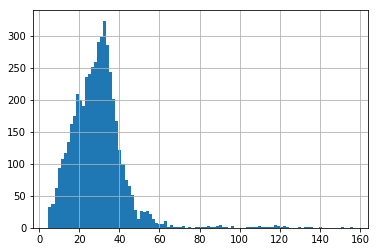

In [15]:
test_data.drop(columns=['ID']).apply(lambda x : np.std(x)/np.mean(x)).hist(bins=100)

In [55]:
# cv = train_data.applymap(lambda x : np.std(x)/np.mean(x))
# 

In [3]:
test_ids = test_data.ID.values
train_target = train_data.target
train_data.drop(columns=['ID', 'target'], axis=1, inplace=True)
test_data.drop(columns=['ID'], axis=1, inplace=True)

In [16]:
del all_data
import gc
gc.collect()

181

In [18]:
# check and remove constant columns
const_columns = []
for col in train_data.columns:
    if train_data[col].std() == 0: 
        const_columns.append(col)

In [19]:
train_data.drop(const_columns, axis=1, inplace=True)
test_data.drop(const_columns, axis=1, inplace=True) 

In [20]:
stds = []
for col in train_data.columns:
    std = train_data[col].apply(lambda x: np.log(x+1)).std() 
    stds.append((std, col))

In [21]:
groups = defaultdict(list)

for i, feat in stds:
    groups[round(i, 5)].append(feat)

In [22]:
susp = []
for key in groups:
    if len(groups[key]) > 1:
        susp += groups[key][1:]

In [23]:
train_data.drop(susp, axis=1, inplace=True) 
test_data.drop(susp, axis=1, inplace=True)

In [24]:
colsToRemove = []
colsScaned = []
dupList = {}

columns = train_data.columns

for i in range(len(columns)-1):
    v = train_data[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, train_data[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
# remove duplicate columns in the training set


In [25]:
train_data.drop(colsToRemove, axis=1, inplace=True) 
test_data.drop(colsToRemove, axis=1, inplace=True)

In [26]:
def drop_sparse(train, test):
    flist = [x for x in train.columns if not x in ['ID','target']]
    for f in flist:
        if len(np.unique(train[f]))<2:
            train.drop(f, axis=1, inplace=True)
            test.drop(f, axis=1, inplace=True)
    return train, test

In [27]:
train_data, test_data = drop_sparse(train_data, test_data)

In [328]:
feats = [3916]

In [329]:
fm = []
# mults = [0.01, 0.1, 10, 100, 2, 3, 4, 5, 6]


for feat in feats:
    for i in range(len(mults)):
        fm.append((train_data.values[:,feat]*mults[i]).reshape(-1,1))
    

In [373]:
f3916 = (train_data.values[:,3916]).reshape(-1,1)

In [374]:
for i in range(f3916.shape[0]):
    f3916[i] = f3916[i]*id2mult.get(i, 1)*id2multinter.get(i, 1)

In [375]:
f3916

array([[1866666.66],
       [      0.  ],
       [      0.  ],
       ...,
       [      0.  ],
       [ 200000.  ],
       [      0.  ]])

In [330]:
add_feat = np.concatenate(fm, axis=1)

In [128]:
add_feat.shape

(4459, 297)

In [35]:
# td = np.concatenate([td,
# #                      f3916,
# # #                      sum_raw_train.reshape(-1,1),
# # #                      sum_raw_train2.reshape(-1,1),
# #                      sum_raw_train3.reshape(-1,1)
#                      np.sum(td, axis=1).reshape(-1, 1)
#                     ], axis=1)
td =train_data.values

In [38]:
for i in range(td.shape[1]):
    td[:,i] = td[:,i]*mults[i]

In [401]:
np.sum(td, axis=1)

array([7.20768333e+08, 5.31966667e+08, 7.62000000e+06, ...,
       2.35114967e+09, 9.44000000e+07, 2.05137885e+09])

In [426]:
test_td = test_data.values

In [104]:
td.shape

(4459, 4483)

In [287]:
for i in range(sum_raw_train2.shape[0]):
    sum_raw_train2[i] = sum_raw_train2[i]*id2mult.get(i, 1)

In [288]:
for i in range(sum_raw_train3.shape[0]):
    sum_raw_train3[i] = sum_raw_train3[i]*id2mult.get(i, 1)*id2multinter.get(i, 1)

In [276]:
for i in range(sum_raw_test2.shape[0]):
    sum_raw_test2[i] = sum_raw_test2[i]*id2mult.get(i+4459, 1)

In [249]:
for i in range(sum_raw_train.shape[0]):
    sum_raw_train[i] = sum_raw_train[i]*id2multinter.get(i, 1)

In [40]:
for i in range(test_td.shape[0]):
    test_td[i] = test_td[i]*id2mult.get(i+4459, 1)

In [432]:
for i in range(td.shape[0]):
    td[i] = td[i]*id2mult.get(i, 1)*id2multinter.get(i, 1)

In [427]:
for i in range(test_td.shape[0]):
    test_td[i] = test_td[i]*id2mult.get(i+4459, 1)*id2multinter.get(i+4459, 1)

In [117]:
N_COMP = 10

In [118]:
data = np.concatenate([train_data, test_data])

In [62]:
train_data.shape

(4459, 4993)

In [119]:
print("PCA")
pca = PCA(n_components=N_COMP, random_state=17)
pca.fit(data)
pca_results_train = pca.transform(train_data)
pca_results_test = pca.transform(test_data)

print("tSVD")
tsvd = TruncatedSVD(n_components=N_COMP, random_state=17)
tsvd.fit(data)
tsvd_results_train = tsvd.transform(train_data)
tsvd_results_test = tsvd.transform(test_data)

print("ICA")
ica = FastICA(n_components=N_COMP, random_state=17)
ica.fit(data)
ica_results_train = ica.transform(train_data)
ica_results_test = ica.transform(test_data)

# print("FA")
# fa = FactorAnalysis(n_components=N_COMP, random_state=17)
# fa.fit(data)
# fa_results_train = fa.transform(train_data)
# fa_results_test = fa.transform(test_data)

print("GRP")
grp = GaussianRandomProjection(n_components=N_COMP, eps=0.1, random_state=17)
grp.fit(data)
grp_results_train = grp.transform(train_data)
grp_results_test = grp.transform(test_data)

print("SRP")
srp = SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
srp.fit(data)
srp_results_train = srp.transform(train_data)
srp_results_test = srp.transform(test_data)

PCA
tSVD


KeyboardInterrupt: 

In [25]:
train_data_bin = train_data.applymap(lambda x: 1 if x > 0 else 0)
test_data_bin = test_data.applymap(lambda x: 1 if x > 0 else 0)

In [26]:
data_bin = np.concatenate([train_data_bin, test_data_bin])

In [27]:
del data
gc.collect()

0

In [31]:
del data_log, data_bin
gc.collect()

0

In [28]:
print("PCA")
pca_bin = PCA(n_components=N_COMP, random_state=17)
pca_bin.fit(data_bin)
pca_results_train_bin = pca_bin.transform(train_data_bin)
pca_results_test_bin = pca_bin.transform(test_data_bin)

print("tSVD")
tsvd_bin = TruncatedSVD(n_components=N_COMP, random_state=17)
tsvd_bin.fit(data_bin)
tsvd_results_train_bin = tsvd_bin.transform(train_data_bin)
tsvd_results_test_bin = tsvd_bin.transform(test_data_bin)

print("ICA")
ica_bin = FastICA(n_components=N_COMP, random_state=17)
ica_bin.fit(data_bin)
ica_results_train_bin = ica_bin.transform(train_data_bin)
ica_results_test_bin = ica_bin.transform(test_data_bin)

print("FA")
fa_bin = FactorAnalysis(n_components=N_COMP, random_state=17)
fa_bin.fit(data_bin)
fa_results_train_bin = fa_bin.transform(train_data_bin)
fa_results_test_bin = fa_bin.transform(test_data_bin)

print("GRP")
grp_bin = GaussianRandomProjection(n_components=N_COMP, eps=0.1, random_state=17)
grp_bin.fit(data_bin)
grp_results_train_bin = grp_bin.transform(train_data_bin)
grp_results_test_bin = grp_bin.transform(test_data_bin)

print("SRP")
srp_bin = SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
srp_bin.fit(data_bin)
srp_results_train_bin = srp_bin.transform(train_data_bin)
srp_results_test_bin = srp_bin.transform(test_data_bin)

PCA
tSVD
ICA
FA
GRP
SRP


In [108]:
print("SRP")
srp_bin = SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
srp_results_train_bin = srp_bin.fit_transform(train_data_bin)
srp_results_test_bin = srp_bin.transform(test_data_bin)

SRP


In [55]:
kernel_pca = KernelPCA(n_components=N_COMP, random_state=17)
kpca_results_train_bin = kernel_pca.fit_transform(train_data_bin)
kpca_results_test_bin = kernel_pca.transform(test_data_bin)

In [56]:
kernel_pca_raw = KernelPCA(n_components=N_COMP, random_state=17)
kpca_results_train = kernel_pca_raw.fit_transform(train_data)
kpca_results_test = kernel_pca_raw.transform(test_data)

In [400]:
sum_raw_train = train_data.apply(sum, axis=1).values
# sum_raw_train2 = train_data.apply(sum, axis=1).values
# sum_raw_train3 = train_data.apply(sum, axis=1).values
# sum_raw_train10 = train_data.apply(sum, axis=1).values
# sum_raw_train100 = train_data.apply(sum, axis=1).values*100
# sum_raw_train01 = train_data.apply(sum, axis=1).values*0.1
# sum_raw_test = test_data.apply(sum, axis=1).values
# sum_raw_test2 = test_data.apply(sum, axis=1).values

# sum_log_train = train_data.apply(lambda x: sum(np.log(x+1)), axis=1).values
# sum_log_test = test_data.apply(lambda x: sum(np.log(x+1)), axis=1).values

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [30]:
mean_raw_train = train_data.apply(np.mean, axis=1).values
mean_raw_test = test_data.apply(np.mean, axis=1).values

mean_log_train = train_data.apply(lambda x: np.mean(np.log(x+1)), axis=1).values
mean_log_test = test_data.apply(lambda x: np.mean(np.log(x+1)), axis=1).values

In [31]:
mean_raw_train_bin = train_data_bin.apply(np.mean, axis=1).values
mean_raw_test_bin = test_data_bin.apply(np.mean, axis=1).values

In [255]:
train_data_log = train_data.applymap(lambda x: np.log(x+1))
# test_data_log = test_data.applymap(lambda x: np.log(x+1))

In [33]:
data_log = np.concatenate([train_data_log, test_data_log])

In [34]:
print("PCA")
pca_log = PCA(n_components=N_COMP, random_state=17)
pca_log.fit(data_log)
pca_log_results_train = pca_log.transform(train_data_log)
pca_log_results_test = pca_log.transform(test_data_log)

print("tSVD")
tsvd_log = TruncatedSVD(n_components=N_COMP, random_state=17)
tsvd_log.fit(data_log)
tsvd_log_results_train = tsvd_log.transform(train_data_log)
tsvd_log_results_test = tsvd_log.transform(test_data_log)

print("ICA")
ica_log = FastICA(n_components=N_COMP, random_state=17)
ica_log.fit(data_log)
ica_log_results_train = ica_log.transform(train_data_log)
ica_log_results_test = ica_log.transform(test_data_log)

print("FA")
fa_log = FactorAnalysis(n_components=N_COMP, random_state=17)
fa_log.fit(data_log)
fa_log_results_train = fa_log.transform(train_data_log)
fa_log_results_test = fa_log.transform(test_data_log)

print("GRP")
grp_log = GaussianRandomProjection(n_components=N_COMP, eps=0.1, random_state=17)
grp_log.fit(data_log)
grp_log_results_train = grp_log.transform(train_data_log)
grp_log_results_test = grp_log.transform(test_data_log)

print("SRP")
srp_log = SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
srp_log.fit(data_log)
srp_log_results_train = srp_log.transform(train_data_log)
srp_log_results_test = srp_log.transform(test_data_log)

PCA
tSVD
ICA
FA
GRP
SRP


In [35]:
train_matrix = np.concatenate([pca_results_train,
                            tsvd_results_train,
                            ica_results_train,
                            fa_results_train,
                            grp_results_train,
                            srp_results_train,
                               pca_log_results_train,
                            tsvd_log_results_train,
                            ica_log_results_train,
                            fa_log_results_train,
                            grp_log_results_train,
                            srp_log_results_train,
                               pca_results_train_bin,
                            tsvd_results_train_bin,
                            ica_results_train_bin,
                            fa_results_train_bin,
                            grp_results_train_bin,
                            srp_results_train_bin,
#                                kpca_results_train_bin,
#                                kpca_results_train,
                            sum_raw_train.reshape(-1,1),
                            sum_log_train.reshape(-1,1),
                            mean_raw_train.reshape(-1,1),
                            mean_log_train.reshape(-1,1),
                           mean_raw_train_bin.reshape(-1,1)], axis=1)

In [36]:
test_matrix = np.concatenate([pca_results_test,
                            tsvd_results_test,
                            ica_results_test,
                            fa_results_test,
                            grp_results_test,
                            srp_results_test,
                              pca_log_results_test,
                            tsvd_log_results_test,
                            ica_log_results_test,
                            fa_log_results_test,
                            grp_log_results_test,
                            srp_log_results_test,
                               pca_results_test_bin,
                            tsvd_results_test_bin,
                            ica_results_test_bin,
                            fa_results_test_bin,
                            grp_results_test_bin,
                            srp_results_test_bin,
#                               kpca_results_test_bin,
#                                kpca_results_test,
                            sum_raw_test.reshape(-1,1),
                            sum_log_test.reshape(-1,1),
                            mean_raw_test.reshape(-1,1),
                            mean_log_test.reshape(-1,1),
                           mean_raw_test_bin.reshape(-1,1)], axis=1)

In [117]:
X_train = train_data.drop(columns=list(d[d==66.77].index) + ['target', 'ID']).values[:4000]
X_valid = train_data.drop(columns=list(d[d==66.77].index) + ['target', 'ID']).values[4000:]

y_train = np.log(train_data.target)[:4000]
y_valid = np.log(train_data.target)[4000:]

In [278]:
xgb_train_full = xgb.DMatrix(td, np.log(train_target))
xgb_test = xgb.DMatrix(test_td)

In [197]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop(columns=['ID', 'target'])[columns[2:]], 
                                                                      train_data.target.values, 
                                                      test_size=0.1, random_state=21)

In [154]:
new_train = np.zeros((500000, 5))
new_targ = np.zeros((500000,1))
k = 0
for row in range(X_train.shape[0]):
    r = X_train.iloc[row].values
    for j in range(1, len(r)-5):
        
        new_train[k] = r[j:j+5]
        new_targ[k] = r[j-1]
        if k == 499999:
            raise StopIteration
        k += 1

StopIteration: 

In [174]:
y_train[row]

10814666.66

In [38]:
d2next = defaultdict(Counter)

for row in range(train_data.shape[0]):
    r = list(train_data.iloc[row][columns[2:250]].values)[::-1]
    
    for j in range(0, len(r)-1, 2):
        
        dig = str(r[j])
        nex = r[j+1]
        if nex < 1:
            continue
        
        
        d2next[dig].update([str(nex)])

In [30]:
len(d2next)

3519

In [39]:
d2next

defaultdict(collections.Counter,
            {'2417333.34': Counter({'1252000': 1,
                      '2000000.0': 1,
                      '34400000': 1,
                      '370000.0': 2,
                      '450000.0': 3,
                      '53333.34': 1,
                      '740000.0': 1,
                      '82760000': 1}),
             '2622000.0': Counter({'300000.0': 1,
                      '400000.0': 1,
                      '5400000.0': 1,
                      '7443333.34': 1,
                      '830000.0': 1,
                      '966666.66': 1}),
             '1146666.66': Counter({'3225400.0': 1, '50676000.0': 1}),
             '2420000.0': Counter({'1491000.0': 1,
                      '1670000': 1,
                      '1821000.0': 2,
                      '2200000.0': 1,
                      '2260000.0': 1,
                      '2420000.0': 1,
                      '742000.0': 1,
                      '990000.0': 3}),
             '91000.0': Coun

In [40]:
pred = []
for i in range(train_data.shape[0]):
    char = str(train_data.iloc[i][columns[2:]].values[-1])
    nex = d2next.get(char, None)
    if nex:
        dig_next = nex.most_common(1)[0][0]
        if dig_next:
            dig_next_next = d2next.get(dig_next, None)
            if dig_next_next:
                pred.append(float(dig_next_next.most_common(1)[0][0]))
            else:
                pred.append(dig_next)
    else:
        pred.append(30000)

In [43]:
train_data.target

0       38000000.00
1         600000.00
2       10000000.00
3        2000000.00
4       14400000.00
5        2800000.00
6         164000.00
7         600000.00
8         979000.00
9         460000.00
10       1100000.00
11      16000000.00
12        354000.00
13       7000000.00
14        100000.00
15        800000.00
16        200000.00
17       3600000.00
18       2786000.00
19         40000.00
20       1600000.00
21       3266666.66
22       6140000.00
23      14886000.00
24        833333.34
25        400000.00
26       6500000.00
27       1700000.00
28        933333.34
29       4000000.00
           ...     
4429     1066666.66
4430    20100000.00
4431    20000000.00
4432    20000000.00
4433     2200000.00
4434       74000.00
4435      800000.00
4436    20000000.00
4437     5000000.00
4438     6000000.00
4439     4666666.66
4440       60000.00
4441      600000.00
4442     2000000.00
4443      528666.66
4444      300000.00
4445     1000000.00
4446    10000000.00
4447     4000000.00


In [42]:
d2next[str(train_data.iloc[0]['f190486d6'])]

Counter({'1000000.0': 16,
         '1200000.0': 1,
         '12066666.66': 1,
         '1266666.66': 2,
         '1600000.0': 2,
         '1866666.66': 102,
         '200000.0': 2,
         '2000000.0': 1,
         '20500000.0': 4,
         '2500000.0': 1,
         '3400000.0': 2,
         '38000000.0': 1,
         '400000.0': 2,
         '40000000.0': 1,
         '450000.0': 1,
         '5000000.0': 2,
         '600000.0': 1,
         '700000.0': 2,
         '800000.0': 4,
         '966666.66': 1})

In [46]:
train_data.iloc[0]['f190486d6']

1866666.66

In [44]:
d2next['1866666.66']

Counter({'1000000.0': 16,
         '1200000.0': 1,
         '12066666.66': 1,
         '1266666.66': 2,
         '1600000.0': 2,
         '1866666.66': 102,
         '200000.0': 2,
         '2000000.0': 1,
         '20500000.0': 4,
         '2500000.0': 1,
         '3400000.0': 2,
         '38000000.0': 1,
         '400000.0': 2,
         '40000000.0': 1,
         '450000.0': 1,
         '5000000.0': 2,
         '600000.0': 1,
         '700000.0': 2,
         '800000.0': 4,
         '966666.66': 1})

In [26]:
list(zip(list(train_data.target.values), pred))

[(38000000.0, 0.0),
 (600000.0, 0.0),
 (10000000.0, 0.0),
 (2000000.0, 0.0),
 (14400000.0, 0.0),
 (2800000.0, 0.0),
 (164000.0, 0.0),
 (600000.0, 0.0),
 (979000.0, 0.0),
 (460000.0, 0.0),
 (1100000.0, 0.0),
 (16000000.0, 0.0),
 (354000.0, 0.0),
 (7000000.0, 0.0),
 (100000.0, 0.0),
 (800000.0, 0.0),
 (200000.0, 0.0),
 (3600000.0, 0.0),
 (2786000.0, 0.0),
 (40000.0, 0.0),
 (1600000.0, 0.0),
 (3266666.66, 0.0),
 (6140000.0, 0.0),
 (14886000.0, 0.0),
 (833333.34, 0.0),
 (400000.0, 0.0),
 (6500000.0, 0.0),
 (1700000.0, 0.0),
 (933333.34, 0.0),
 (4000000.0, 0.0),
 (102000.0, 0.0),
 (20000000.0, 0.0),
 (4666666.66, 0.0),
 (20000000.0, 0.0),
 (890000.0, 0.0),
 (6000000.0, 0.0),
 (20000000.0, 0.0),
 (2000000.0, 0.0),
 (18000000.0, 0.0),
 (6400000.0, 0.0),
 (20000000.0, 0.0),
 (10000000.0, 0.0),
 (5000000.0, 0.0),
 (9000000.0, 0.0),
 (34738000.0, 0.0),
 (4000000.0, 0.0),
 (1650000.0, 0.0),
 (4500000.0, 0.0),
 (13200000.0, 0.0),
 (10000000.0, 0.0),
 (2450000.0, 0.0),
 (10050000.0, 0.0),
 (1400000

In [15]:
rmsle(train_data.target.values, pred)

4.532990889763236

In [155]:
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(new_train, 
                                                                      np.log1p(new_targ), 
                                                      test_size=0.1, random_state=21)

In [156]:
xgb_train = xgb.DMatrix(X_train_new, y_train_new)
xgb_valid = xgb.DMatrix(X_valid_new, y_valid_new)

In [453]:
xgb_test1 = xgb.DMatrix(test_data.drop(columns=['f190486d6']))


In [159]:
param = {'n_estimators':5000,
         'max_depth':7, 
         'lambda':1,
         'eta': 0.3, 
#         "colsample_bytree":0.5,
#          "tweedie_variance_power":1.2,
         'objective': 'reg:linear', 
         'eval_metric':'rmse',
        'gamma':0.1}

eval_set  = [(xgb_train,'train'), (xgb_valid, 'test')]
# eval_set_test  = [(xgb_train_full,'train')]


In [161]:
bst = xgb.train(param, xgb_train, 800, eval_set)

[0]	train-rmse:4.83448	test-rmse:4.79023
[1]	train-rmse:4.62927	test-rmse:4.59492
[2]	train-rmse:4.52311	test-rmse:4.49654
[3]	train-rmse:4.46766	test-rmse:4.44594
[4]	train-rmse:4.43799	test-rmse:4.42016
[5]	train-rmse:4.42173	test-rmse:4.4081
[6]	train-rmse:4.41191	test-rmse:4.40238
[7]	train-rmse:4.40457	test-rmse:4.39882
[8]	train-rmse:4.39974	test-rmse:4.39753
[9]	train-rmse:4.39513	test-rmse:4.39617
[10]	train-rmse:4.39188	test-rmse:4.39528
[11]	train-rmse:4.38844	test-rmse:4.39374
[12]	train-rmse:4.3848	test-rmse:4.39278
[13]	train-rmse:4.38365	test-rmse:4.39319
[14]	train-rmse:4.38006	test-rmse:4.39233
[15]	train-rmse:4.37733	test-rmse:4.39176
[16]	train-rmse:4.37567	test-rmse:4.3917
[17]	train-rmse:4.37382	test-rmse:4.39207
[18]	train-rmse:4.372	test-rmse:4.39113
[19]	train-rmse:4.37071	test-rmse:4.39112
[20]	train-rmse:4.36731	test-rmse:4.39082
[21]	train-rmse:4.36706	test-rmse:4.39093
[22]	train-rmse:4.36613	test-rmse:4.39064
[23]	train-rmse:4.36552	test-rmse:4.39075
[24]	tr

[195]	train-rmse:4.19545	test-rmse:4.39396
[196]	train-rmse:4.19477	test-rmse:4.39441
[197]	train-rmse:4.1936	test-rmse:4.39425
[198]	train-rmse:4.19318	test-rmse:4.39424
[199]	train-rmse:4.19189	test-rmse:4.39394
[200]	train-rmse:4.19153	test-rmse:4.3941
[201]	train-rmse:4.19112	test-rmse:4.3942
[202]	train-rmse:4.19093	test-rmse:4.39419
[203]	train-rmse:4.19077	test-rmse:4.39436
[204]	train-rmse:4.19059	test-rmse:4.39444
[205]	train-rmse:4.19036	test-rmse:4.39449
[206]	train-rmse:4.19017	test-rmse:4.39451
[207]	train-rmse:4.19009	test-rmse:4.3946
[208]	train-rmse:4.18986	test-rmse:4.39478
[209]	train-rmse:4.18964	test-rmse:4.39507
[210]	train-rmse:4.18896	test-rmse:4.39502
[211]	train-rmse:4.1889	test-rmse:4.39489
[212]	train-rmse:4.18874	test-rmse:4.39503
[213]	train-rmse:4.18824	test-rmse:4.39524
[214]	train-rmse:4.18781	test-rmse:4.39552
[215]	train-rmse:4.18714	test-rmse:4.39581
[216]	train-rmse:4.18571	test-rmse:4.39546
[217]	train-rmse:4.18473	test-rmse:4.39559
[218]	train-rmse

KeyboardInterrupt: 

In [482]:
y_preds = bst.predict(xgb_test1)

In [483]:
y_preds[:10]

array([ 6.5666050e-02,  5.5021226e-02,  7.8346670e-01,  1.6836800e+01,
        5.5021226e-02,  3.5504401e-03,  5.5021226e-02,  1.5863299e-02,
       -9.1208518e-02,  1.3427446e+01], dtype=float32)

In [64]:
sorted(bst.get_fscore().items(), key=lambda x: -x[1])

[('f4358', 23),
 ('f8', 20),
 ('f2500', 17),
 ('f4243', 17),
 ('f2755', 16),
 ('f3866', 15),
 ('f776', 14),
 ('f878', 12),
 ('f3024', 12),
 ('f3660', 11),
 ('f658', 11),
 ('f1224', 10),
 ('f1556', 10),
 ('f4414', 10),
 ('f628', 9),
 ('f3771', 9),
 ('f3397', 9),
 ('f1121', 9),
 ('f549', 9),
 ('f1309', 9),
 ('f655', 8),
 ('f1648', 8),
 ('f4251', 8),
 ('f908', 8),
 ('f2817', 7),
 ('f4581', 7),
 ('f3664', 7),
 ('f2193', 7),
 ('f1873', 7),
 ('f4696', 7),
 ('f1447', 7),
 ('f4758', 7),
 ('f2757', 7),
 ('f2185', 7),
 ('f3431', 7),
 ('f31', 7),
 ('f752', 6),
 ('f1530', 6),
 ('f3741', 6),
 ('f1653', 6),
 ('f3414', 6),
 ('f82', 6),
 ('f4240', 6),
 ('f3728', 6),
 ('f783', 6),
 ('f41', 6),
 ('f4204', 6),
 ('f2835', 6),
 ('f3560', 6),
 ('f4084', 6),
 ('f4466', 6),
 ('f2747', 6),
 ('f2161', 5),
 ('f4554', 5),
 ('f2352', 5),
 ('f60', 5),
 ('f3928', 5),
 ('f693', 5),
 ('f493', 5),
 ('f1478', 5),
 ('f1894', 5),
 ('f916', 5),
 ('f2856', 5),
 ('f2728', 5),
 ('f3856', 5),
 ('f1899', 4),
 ('f3601', 4),
 ('f

In [421]:
from scipy.stats import ks_2samp

In [439]:
train_data.columns[3916]

'f190486d6'

In [445]:
feat2feat = {}
for i, feat in enumerate(train_data.columns):
    st, p = ks_2samp(td[:,3916], test_td[:, i])
    feat2feat[feat] = (st, p)

In [446]:
sorted(feat2feat.items(), key=lambda x: x[1])

[('f190486d6', (0.18322029775492032, 4.0340624432278286e-120)),
 ('58e2e02e6', (0.1881248415512804, 1.2936981203785135e-126)),
 ('eeb9cd3aa', (0.18850990903942433, 3.9329458088858264e-127)),
 ('9fd594eec', (0.18859097587903362, 3.059968203219705e-127)),
 ('6eef030c1', (0.19122564816633447, 8.273148645701602e-131)),
 ('15ace8c9f', (0.19217818353174332, 4.125737216200684e-132)),
 ('fb0f5dbfe', (0.19357658651500298, 4.921349538109552e-134)),
 ('20aa07010', (0.19503578962796964, 4.679206112949495e-136)),
 ('58e056e12', (0.1958464580240622, 3.4699773927986996e-137)),
 ('024c577b9', (0.19647472603103389, 4.586410708419142e-138)),
 ('b43a7cfd5', (0.19921073186784644, 6.329754176797898e-142)),
 ('d6bb78916', (0.19955526593618578, 2.0488850747754316e-142)),
 ('1702b5bf0', (0.19967686619559966, 1.375372912578186e-142)),
 ('324921c7b', (0.20028486749266905, 1.8678978464644306e-143)),
 ('58232a6fb', (0.20036593433227834, 1.4306881063992325e-143)),
 ('62e59a501', (0.2023318051928028, 2.152034748640

In [121]:
xgb_valid_w = xgb.DMatrix(X_valid)

In [199]:
y_preds = bst.predict(xgb_valid)

In [215]:
weights = np.load('weights.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'weights.npy'

In [128]:
weighted_rmsle(y_valid, y_preds, weights[4000:])

1.645618320572297

In [8]:
def weighted_rmsle(y_true, y_pred, weights):
    errors = (y_true - y_pred) ** 2
    errors = errors * weights
    
    return np.sqrt(np.mean(errors))

def rmsle(y_true, y_pred):
#     y_pred[y_pred <= 0] = 0

    errors = (np.log1p(y_true) - np.log1p(y_pred)) ** 2

    return np.sqrt(np.mean(errors))

In [466]:
rmsle(np.log1p(test_data['f190486d6'].values) ,y_preds)

5.272409557954092

In [478]:
print(y_preds[:1000])

[ 6.56660497e-02  5.50212264e-02  7.83466697e-01  1.68367996e+01
  5.50212264e-02  3.55044007e-03  5.50212264e-02  1.58632994e-02
 -9.12085176e-02  1.34274464e+01  3.78159881e-02  5.50212264e-02
 -7.86281824e-02 -2.42868662e-01  3.91356945e-02  1.48070841e+01
 -1.65084779e-01  1.57234163e+01 -1.43860817e-01  7.88567638e+00
 -3.58749807e-01 -1.79753363e-01 -4.73606586e-03  9.51303244e-02
  5.84935546e-02  1.82086229e-02  5.50212264e-02 -2.48469532e-01
  1.46495998e-02 -1.60529017e-02  1.45297117e+01 -5.19837737e-02
  5.50212264e-02  4.09221828e-01 -9.51870203e-01  8.11769605e-01
  7.91190577e+00  5.50212264e-02  1.03191137e-02  5.50212264e-02
 -5.48520446e-01 -2.70983577e-02  7.87102556e+00  2.87127376e-01
  8.13471675e-02  5.52018285e-02  4.94030118e-02  4.45463359e-02
 -4.83065248e-02  5.50212264e-02 -6.48850083e-01  1.43739281e+01
  1.26506329e-01  5.50212264e-02  1.51642427e+01 -4.51534390e-02
  1.37310400e+01  1.61051445e+01  3.55155915e-01  1.63328934e+01
  1.26505022e+01 -3.34243

In [473]:
(test_data['f190486d6'].values[:1000])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.20000000e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.60000000e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.40978815e+06, 4.94000000e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.68400000e+06, 2.90000000e+07,
       5.20000000e+05, 0.00000000e+00, 6.00000000e+06, 0.00000000e+00,
      

In [280]:
bst = xgb.train(param, xgb_train_full, 150, eval_set_test)

[0]	train-rmse:10.7061
[1]	train-rmse:8.16377
[2]	train-rmse:6.26931
[3]	train-rmse:4.86981
[4]	train-rmse:3.84885
[5]	train-rmse:3.11834
[6]	train-rmse:2.60844
[7]	train-rmse:2.26384
[8]	train-rmse:2.03723
[9]	train-rmse:1.86813
[10]	train-rmse:1.7758
[11]	train-rmse:1.71857
[12]	train-rmse:1.66403
[13]	train-rmse:1.62094
[14]	train-rmse:1.59058
[15]	train-rmse:1.56562
[16]	train-rmse:1.54428
[17]	train-rmse:1.52557
[18]	train-rmse:1.51249
[19]	train-rmse:1.4977
[20]	train-rmse:1.4848
[21]	train-rmse:1.47365
[22]	train-rmse:1.46382
[23]	train-rmse:1.45192
[24]	train-rmse:1.44215
[25]	train-rmse:1.43247
[26]	train-rmse:1.4248
[27]	train-rmse:1.41764
[28]	train-rmse:1.4096
[29]	train-rmse:1.40225
[30]	train-rmse:1.39457
[31]	train-rmse:1.38867
[32]	train-rmse:1.38279
[33]	train-rmse:1.3754
[34]	train-rmse:1.36787
[35]	train-rmse:1.36333
[36]	train-rmse:1.35789
[37]	train-rmse:1.35286
[38]	train-rmse:1.34713
[39]	train-rmse:1.34336
[40]	train-rmse:1.33979
[41]	train-rmse:1.33538
[42]	tra

In [281]:
y_pred = bst.predict(xgb_test)

In [282]:
y_pred

array([15.075906, 14.521878, 14.674019, ..., 14.455566, 13.710226,
       15.07867 ], dtype=float32)

In [51]:
y_pred

array([15.9101095, 14.269767 , 14.2933855, ..., 14.183845 , 13.853192 ,
       14.495101 ], dtype=float32)

In [78]:
test_ids

array(['000137c73', '00021489f', '0004d7953', ..., 'fff7c698f',
       'fff8dba89', 'fffbe2f6f'], dtype=object)

In [283]:
sumb = pd.DataFrame({'ID':test_ids, 'target':np.exp(y_pred)})

In [284]:
sumb.to_csv('sumbission_18.txt', index=False)

In [76]:
train_matrix.shape

(4459, 545)

In [285]:
sorted(bst.get_fscore().items(), key=lambda x: -x[1])

[('f4465', 65),
 ('f4466', 45),
 ('f3916', 31),
 ('f3295', 26),
 ('f2277', 23),
 ('f2499', 19),
 ('f3394', 17),
 ('f813', 17),
 ('f1999', 16),
 ('f979', 16),
 ('f1402', 15),
 ('f2733', 14),
 ('f3810', 13),
 ('f3064', 13),
 ('f1775', 13),
 ('f2789', 12),
 ('f1677', 11),
 ('f8', 11),
 ('f4213', 11),
 ('f3751', 11),
 ('f3532', 11),
 ('f3963', 11),
 ('f1509', 11),
 ('f2567', 11),
 ('f3813', 11),
 ('f4451', 11),
 ('f1196', 11),
 ('f3061', 11),
 ('f2501', 11),
 ('f4260', 11),
 ('f2816', 10),
 ('f725', 10),
 ('f4359', 10),
 ('f3671', 10),
 ('f290', 10),
 ('f4297', 10),
 ('f848', 10),
 ('f3139', 9),
 ('f856', 9),
 ('f3573', 9),
 ('f658', 9),
 ('f2350', 9),
 ('f512', 9),
 ('f1427', 9),
 ('f718', 9),
 ('f161', 9),
 ('f3474', 9),
 ('f4008', 9),
 ('f524', 8),
 ('f2491', 8),
 ('f301', 8),
 ('f3586', 8),
 ('f4452', 8),
 ('f2355', 8),
 ('f2093', 8),
 ('f34', 8),
 ('f532', 8),
 ('f4063', 7),
 ('f3164', 7),
 ('f4239', 7),
 ('f2939', 7),
 ('f608', 7),
 ('f3820', 7),
 ('f851', 7),
 ('f1833', 7),
 ('f832'

In [83]:
bst.get_fscore()['f540']

73